In [63]:
import pandas as pd
import numpy as np
# Maltplotlib used for static graphs and not for dynamic graphs
# When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# Seaborn - attractive graphical interfaces
import seaborn as sns
# Plot.ly - a more dynamic graph visualization
import plotly.graph_objects as go
import plotly
# Dash - call-back and server client communication
import dash
import dash_core_components as dcc
import dash_html_components as html

# Setting figure size
mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows', 500)
# Seaborn style grid
sns.set(style="darkgrid")

# Explorative Data Analysis

- focus on visualizing data 
- maltplotlib is used

In [64]:
df_plot = pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')
df_plot.sort_values('date', ascending=False).head()

,date,Italy,US,Spain,Germany,"Korea, South"
101,2020-05-02,209328,1132539,216582,164967,10793
100,2020-05-01,207428,1103461,213435,164077,10780
99,2020-04-30,205463,1069424,213435,163009,10774
98,2020-04-29,203591,1039909,212917,161539,10765
97,2020-04-28,201505,1012582,210773,159912,10761


<Figure size 1152x648 with 0 Axes>

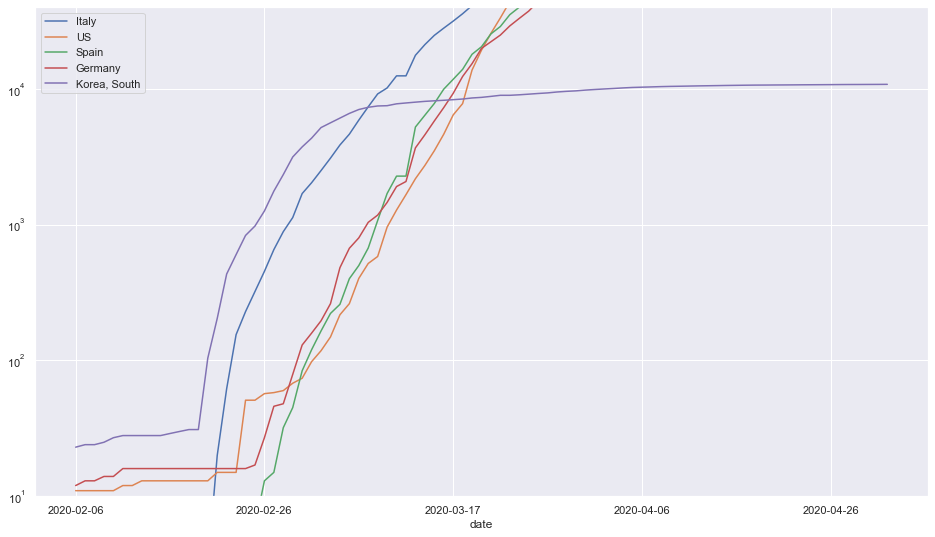

In [65]:
# Adjust x and y axes and changing the graph form to an exponential graph 
plt.figure()
# Slicing out the dataset/dataframe
ax = df_plot.iloc[15:,:].set_index('date').plot()
plt.ylim(10, 40000)
ax.set_yscale('log')

## Plot.ly

In [78]:
plotly.__version__

'4.7.0'

In [79]:
# Making a list of countries 
country_list = ['Italy', 'US', 'Spain','Germany', 'Korea, South',]

In [83]:
fig = go.Figure()

for each in country_list:
    fig.add_trace(go.Scatter(x = df_plot.date,
                             y = df_plot[each],
                             mode = 'markers + lines',
                             opacity = 0.9,
                             line_width = 2,
                             marker_size = 4,
                             name = each
                            )
                 )

# Size of the overall layout - defines how we plot it
fig.update_layout(
    width = 1024,
    height = 900,
    xaxis_title = "Time",
    yaxis_title = "Confirmed infected people(source: John Hopkins csse, log-scale)",
)
fig.update_yaxes(type = "log", range = [1.1, 5.5])
# Possibility to slide along the x-axis
fig.update_layout(xaxis_rangeslider_visible = True)
# To show the graph in the brower itself
fig.show(renderer='browser')
#fig.show()

## Dash environment


In [69]:
# Gives us possibility to for a server-client communication
# Call-back - press button on the screem and new data is sliced out
app = dash.Dash()
# Pusing the above figure = fig
app.layout = html.Div([
    html.Label('Multi-Select Country'),
    dcc.Dropdown(
    id = 'country_drop_down',
    # Dictionary with label created
    options = [
        {'label' : 'Italy', 'value' : 'Italy'},
        {'label' : 'US', 'value' : 'US'},
        {'label' : 'Spain', 'value' : 'Spain'},
        {'label' : 'Germany', 'value' : 'Germany'},
        {'label' : 'Korea, South', 'value' : 'Korea, South'}
    ],
    # Selected by default
    value = ['US', 'Germany'],
    # Many of the labels can be clicked
    multi = True
    ),
    dcc.Graph(figure=fig, id='main_window_slope')
])

In [70]:
# Connected the app.layout with the Graph
from dash.dependencies import Input, Output

@app.callback(
    # Where to update
    Output('main_window_slope', 'figure'),
    # What to update
    [Input('country_drop_down', 'value')])

def update_figure(country_list):
    traces = []
    for each in country_list: 
        # creating a dictionary
        traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                          )
                     )
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
        )
    }



In [ ]:
app.run_server(debug = True, use_reloader = False)

Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Debugger PIN: 316-638-566
Debugger PIN: 316-638-566
Debugger PIN: 316-638-566
Debugger PIN: 316-638-566
Debugger PIN: 316-638-566
Debugger PIN: 316-638-566
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
